In [1]:
import nbimporter
import Dataset as Dataset
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

from torchvision import transforms
import os


import python_file.dataclass as StreetSign
import python_file.function as Function
import python_file.network as Network


In [2]:
model = Network.MiniAlexNetV2()
model.load_state_dict(torch.load('modelli\minialexnetv2_dataset-100.pth'))
model.eval()

MiniAlexNetV2(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1,

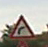

In [3]:
img = Image.open("DITS-full\DITS-full\DITS-detection\class\image\\503.png")
img


In [4]:
transform = transforms.Compose([transforms.Resize(32),transforms.ToTensor()])
img_t = transform(img)

In [5]:
# Definisci le dimensioni di input previste dal tuo modello
input_height = 32
input_width = 32

mean = 0.6529
std = 0.3422

# Applica le trasformazioni alle dimensioni desiderate
preprocess = transforms.Compose([
    transforms.Resize((input_height, input_width)),
    transforms.ToTensor(),  # Converte l'immagine in un tensore PyTorch
    #transforms.Normalize(mean, std),
])

img_t = preprocess(img)  # Ora img_tensor è un tensore PyTorch valido

# Assicurati che img_tensor sia 4D (batch_size, canali, altezza, larghezza)
img_t = img_t.unsqueeze(0)  # Aggiunge una dimensione di batch

# Seleziona solo i primi 3 canali (RGB)
img_t = img_t[:, :3, :, :]

# Ora puoi passare img_tensor al modello
output = model(img_t).detach().numpy().argmax()

In [6]:
print(output)

if (output == 0):
    print("indicatory")

elif (output == 1):
    print("prohibitory")
    
elif (output == 2):
    print("warning")
    
else:
    print("ERROR 404 NOT FOUND")

2
warning
